# Sky Positions of Candidates

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import pandas as pd
import json

---
## Import data

In [2]:
tic = pd.read_csv('../../tic_v2.txt',sep='\t')

In [11]:
data = pd.read_csv('../../candidates/som_candidats.csv',header=None)
# with open("../../colnames.json", "r") as f:
#         check = f.read()
#         columns = json.loads(check)
#         columns = columns["column_names"]
# data.columns = columns
# data['Sector'] = data['path'].str.extract(r'/s(\d+)/').astype(int)
# data.insert(2, 'Sector', data.pop('Sector'))

In [ ]:

merged_data = data.merge(tic, left_on='TIC_ID',right_on='tic_id',how='left')
merged_data

In [ ]:
data.transit_prob.unique()

In [6]:
merged_data.path

0       /storage/astro2/phrdhx/eleanor-lite-project-v2...
1       /storage/astro2/phrdhx/eleanor-lite-project-v2...
2       /storage/astro2/phrdhx/eleanor-lite-project-v2...
3       /storage/astro2/phrdhx/eleanor-lite-project-v2...
4       /storage/astro2/phrdhx/eleanor-lite-project-v2...
                              ...                        
6072    /storage/astro2/phrdhx/eleanor-lite-project-v2...
6073    /storage/astro2/phrdhx/eleanor-lite-project-v2...
6074    /storage/astro2/phrdhx/eleanor-lite-project-v2...
6075    /storage/astro2/phrdhx/eleanor-lite-project-v2...
6076    /storage/astro2/phrdhx/eleanor-lite-project-v2...
Name: path, Length: 6077, dtype: object

In [ ]:
RA = merged_data['RA_orig'] * u.degree
DEC = merged_data['DEC_orig'] * u.degree

In [ ]:
c = SkyCoord(ra=RA, dec=DEC, frame='icrs')
ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian

---
## Sky Positions

In [ ]:
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

# Assuming you have a DataFrame 'lightcurves' with columns 'TIC', 'RA', 'DEC', and 'coords'
RA = merged_data['RA_orig']
DEC = merged_data['DEC_orig']
TIC = merged_data['TIC_ID']
coords = merged_data['Sector']

# Get unique 'coords' values
unique_coords = coords.unique()

# Define a list of colors for each unique 'coords' value
bin_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#a6cee3', '#b2df8a','#00FFFF', '#7FFFD4','#13EAC9','#FFD700','#DAA520','#FFC0CB','#DDA0DD','#4B0082','#FF4500','#9ACD32','#800000','#000080','#FF6347','#F0E68C','#E6E6FA','#F5F5DC','#FF7F50','#ADD8E6']

# Create a ListedColormap using the specific colors
custom_cmap = ListedColormap(bin_colors)

# Convert RA and DEC to radians using Astropy units
ra_rad = np.radians(RA) * u.deg
dec_rad = np.radians(DEC) * u.deg

# Create the Aitoff projection
plt.figure(figsize=(20, 13))
ax = plt.subplot(111, projection='aitoff')

# Create a scatter plot with color-coded points using custom colors
scatter = ax.scatter(ra_rad, dec_rad, c=coords, cmap=custom_cmap, marker='o', s=10)

# Add color bar to show the mapping from 'coords' values to colors
cbar = plt.colorbar(scatter, ticks=unique_coords, format='%d')

cbar.set_label('SOM Coords')

plt.title('Skyplot (Aitoff Projection) - TIC by RA and DEC (Color-coded by SOM Coords)')

plt.grid(True)

plt.show()

In [ ]:
from matplotlib.ticker import FuncFormatter


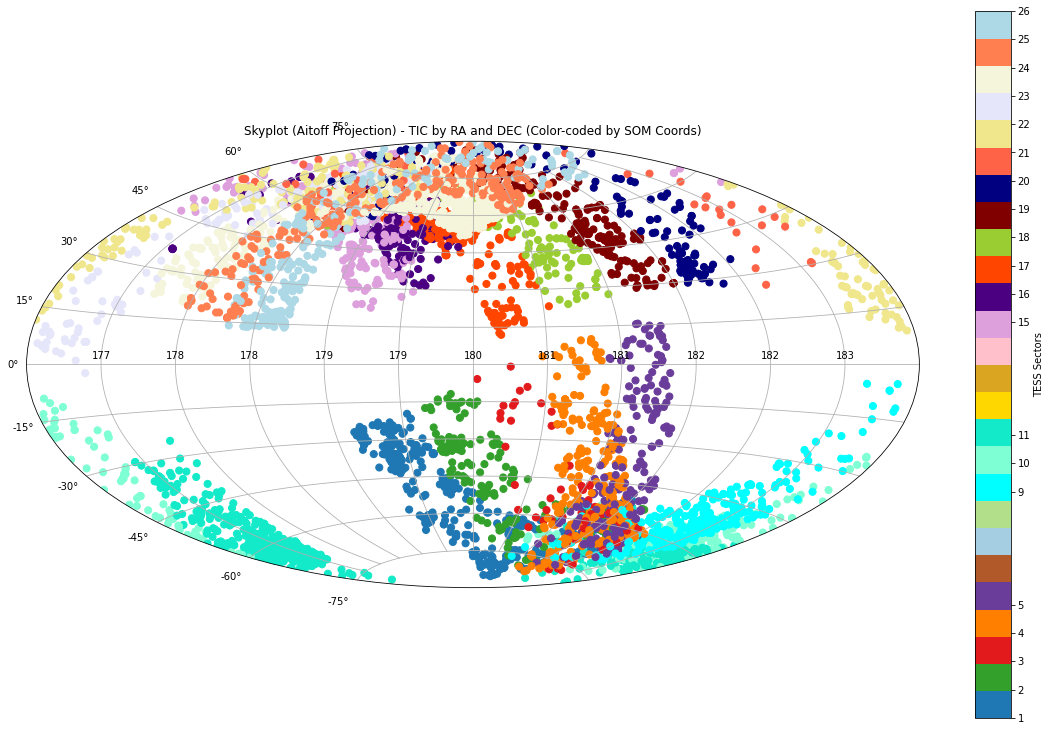

In [61]:
# Assuming you have a DataFrame 'lightcurves' with columns 'TIC', 'RA', 'DEC', and 'coords'
RA = merged_data['RA_orig']
DEC = merged_data['DEC_orig']
TIC = merged_data['TIC_ID']
coords = merged_data['Sector']

# Get unique 'coords' values
unique_coords = coords.unique()

# Define a list of colors for each unique 'coords' value
bin_colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a', '#b15928', '#a6cee3', '#b2df8a','#00FFFF', '#7FFFD4','#13EAC9','#FFD700','#DAA520','#FFC0CB','#DDA0DD','#4B0082','#FF4500','#9ACD32','#800000','#000080','#FF6347','#F0E68C','#E6E6FA','#F5F5DC','#FF7F50','#ADD8E6']

# Create a ListedColormap using the specific colors
custom_cmap = ListedColormap(bin_colors)

# Create the Aitoff projection
plt.figure(figsize=(20, 13))
ax = plt.subplot(111, projection='aitoff')

# Convert RA values from 0-360 range to -180 to 180 range
ra_rad = np.deg2rad(np.where(RA > 180, RA - 360, RA))

# Convert DEC values to radians
dec_rad = np.deg2rad(DEC)

# Create a scatter plot with color-coded points using custom colors
scatter = ax.scatter(ra_rad, dec_rad, c=coords, cmap=custom_cmap, marker='o', s=50)

# Add color bar to show the mapping from 'coords' values to colors
cbar = plt.colorbar(scatter, ticks=unique_coords, format='%d')

cbar.set_label('TESS Sectors')

def format_ra_ticks(x, pos):
    return f"{x + 180:.0f}"  # Add 180 degrees to the tick values to shift them to 0-360

ax = plt.gca()
ax.xaxis.set_major_formatter(FuncFormatter(format_ra_ticks))

plt.title('Skyplot (Aitoff Projection) - TIC by RA and DEC (Color-coded by SOM Coords)')

plt.grid(True)

plt.show()